In [1]:
# Import dependencies and setup pathlib to load csv files
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load csv dataset file from 'Resources' folder
load_iraw_data = Path("Resources/iraw_data.csv")

# Read iram_data csv file and store dataset into new Pandas DataFrame
iraw_df = pd.read_csv(load_iraw_data, index_col = False)

# Only Region Type listed in the Dataset is 'Metro'
# Therefore, the scope of my dataset covers Active Sales Properties for Metropolitan USA
iraw_df

,indicator_id,region_id,date,value,region_type,region,City,State
0,IRAW,845172,2023-10-07,138.0,metro,"Winfield, KS",Winfield,KS
1,IRAW,845172,2023-09-30,141.0,metro,"Winfield, KS",Winfield,KS
2,IRAW,845172,2023-09-23,140.0,metro,"Winfield, KS",Winfield,KS
3,IRAW,845172,2023-09-16,145.0,metro,"Winfield, KS",Winfield,KS
4,IRAW,845172,2023-09-09,144.0,metro,"Winfield, KS",Winfield,KS
...,...,...,...,...,...,...,...,...
266572,IRAW,394297,2018-02-10,160.0,metro,"Aberdeen, SD",Aberdeen,SD
266573,IRAW,394297,2018-02-03,157.0,metro,"Aberdeen, SD",Aberdeen,SD
266574,IRAW,394297,2018-01-27,155.0,metro,"Aberdeen, SD",Aberdeen,SD
266575,IRAW,394297,2018-01-20,159.0,metro,"Aberdeen, SD",Aberdeen,SD


In [3]:
# According to the United States Census Bureau, the USA can be broken down into 4 Regions.
# Source: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

# Northeast Region tuple = 9 States
region_northeast = ('CT', 'MA', 'ME', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT')

# Midwest Region tuple = 12 States
region_midwest = ('IA', 'IL', 'IN', 'KS', 'MI', 'MN', 'MO', 'ND', 'NE', 'OH', 'SD', 'WI')

# South Region tuple = 17 States (including District of Columbia i.e. DC)
region_south = ('AL', 'AR', 'DC', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV')

# West Region tuple = 13 States
region_west = ('AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY')

# In the 'Census Region' column, add 'Northeast' for all rows if their 'State' value belongs in region_northeast
iraw_df.loc[iraw_df['State'].isin(region_northeast), 'Census Region'] = "Northeast"

# In the 'Census Region' column, add 'Midwest' for all rows if their 'State' value belongs in region_midwest
iraw_df.loc[iraw_df['State'].isin(region_midwest), 'Census Region'] = "Midwest"

# In the 'Census Region' column, add 'South' for all rows if their 'State' value belongs in region_south
iraw_df.loc[iraw_df['State'].isin(region_south), 'Census Region'] = "South"

# In the 'Census Region' column, add 'South' for all rows if their 'State' value belongs in region_west
iraw_df.loc[iraw_df['State'].isin(region_west), 'Census Region'] = "West"

iraw_df

,indicator_id,region_id,date,value,region_type,region,City,State,Census Region
0,IRAW,845172,2023-10-07,138.0,metro,"Winfield, KS",Winfield,KS,Midwest
1,IRAW,845172,2023-09-30,141.0,metro,"Winfield, KS",Winfield,KS,Midwest
2,IRAW,845172,2023-09-23,140.0,metro,"Winfield, KS",Winfield,KS,Midwest
3,IRAW,845172,2023-09-16,145.0,metro,"Winfield, KS",Winfield,KS,Midwest
4,IRAW,845172,2023-09-09,144.0,metro,"Winfield, KS",Winfield,KS,Midwest
...,...,...,...,...,...,...,...,...,...
266572,IRAW,394297,2018-02-10,160.0,metro,"Aberdeen, SD",Aberdeen,SD,Midwest
266573,IRAW,394297,2018-02-03,157.0,metro,"Aberdeen, SD",Aberdeen,SD,Midwest
266574,IRAW,394297,2018-01-27,155.0,metro,"Aberdeen, SD",Aberdeen,SD,Midwest
266575,IRAW,394297,2018-01-20,159.0,metro,"Aberdeen, SD",Aberdeen,SD,Midwest


In [4]:
# Further aggregation is required
# Aggregate Active Sales Properties by Census Region & Date
groupby_usa_region = iraw_df.groupby(["Census Region", "date"])["value"].sum().reset_index()

# Convert date into datetime; used for plotting
groupby_usa_region["date"] = pd.to_datetime(groupby_usa_region["date"])

# Add 'Year' column; used for plotting
groupby_usa_region['Year'] = groupby_usa_region['date'].dt.year

# Remove rows with Year 2017 and 2018; will not be plotted
remove_years = [2017, 2018]
groupby_usa_region = groupby_usa_region[~groupby_usa_region["Year"].isin(remove_years)]

groupby_usa_region

,Census Region,date,value,Year
65,Midwest,2019-01-05,191469.0,2019
66,Midwest,2019-01-12,192443.0,2019
67,Midwest,2019-01-19,193061.0,2019
68,Midwest,2019-01-26,189020.0,2019
69,Midwest,2019-02-02,186871.0,2019
...,...,...,...,...
1251,West,2023-09-09,138700.0,2023
1252,West,2023-09-16,141466.0,2023
1253,West,2023-09-23,141810.0,2023
1254,West,2023-09-30,141201.0,2023


In [5]:
# Function to change year in a date (datetime element) to 2021
def change_year_2021(date):
    # For every date value...
    try:
        # Try to replace the year with '2021'; if successful, move on to the next and attempt
        return date.replace(year = 2021)
    
    # If a 'ValueError' is triggered when attempted...
    except ValueError:
        
        # Then the day in the date is out of range (e.g. Leap Year; February 29th) so subtract date by one day and attempt again
        return (date - pd.Timedelta(days = 1)).replace(year = 2021)


# Function to generate a time series plot; to be called for every USA region
def plot_region_time_series (region_df) :
    
    # In new column, add 'date' element (datetime converted) where year is changed 2021 in the region DataFrame
    # Time series is plotted using 'plot_date' as the x axis; this will help with plotting each year as their own line 
    region_df['plot_date'] = region_df['date'].apply(change_year_2021)
    
    # Get the USA Metropolitan Region name from the DataFrame
    region_name = ', '.join(region_df['Census Region'].unique().astype(str))
    
    # Going by Meterological Seasons; USA in Northern Hemisphere
    # Source: https://www.timeanddate.com/calendar/aboutseasons.html
    # List of dictionaries defining a section of the time series (by x axis) to colour according to season of the year 
    season_sections = [
        {'start_season': '2021-01-01', 'end_season': '2021-03-01', 'color': 'deepskyblue'}, # Winter Season
        {'start_season': '2021-03-01', 'end_season': '2021-05-31', 'color': 'limegreen'},   # Spring Season
        {'start_season': '2021-05-31', 'end_season': '2021-08-31', 'color': 'gold'},        # Summer Season
        {'start_season': '2021-08-30', 'end_season': '2021-11-30', 'color': 'indianred'},   # Autumn Season
        {'start_season': '2021-11-30', 'end_season': '2021-12-31', 'color': 'deepskyblue'}] # Winter Season


    # Set Figure Size
    plt.figure(figsize=(12, 6))

    # Plot the data using the 'plot_date' column
    # For every unique 'Year' value...
    for year in region_df['Year'].unique():
        
        # Extract all rows for the current Year and keep in a new DataFrame subset
        subset = region_df[region_df['Year'] == year]
        
        # Using the subset, plot a line where x = 'plot_date', y = For-Sale Inventory
        # Beautify the plot points and line itself
        plt.plot(subset['plot_date'], subset['value'], label = year,
                 marker = 'o', markeredgecolor = "black", markersize = 3.5, linewidth = 2)
        
        # Get the date & 'For-Sale Inventory' from the first row of the subset 
        # To be used as reference information when annotating
        first_date = subset['plot_date'].iloc[0]
        first_value = subset['value'].iloc[0]
        
        # For the current line plot, annotate the 'Year' label at the first plot point of the line.
        # Offset it and beautify the label
        # Add an arrow prop so that it points to the first plot point of the line
        plt.annotate(str(year), (first_date, first_value),
                     xytext=(-30,20), textcoords = 'offset points',
                     fontsize = 12, color='black', weight = "bold",
                     arrowprops=dict(arrowstyle = "->"))

    
    # Store a list of end of month dates for all of 2021
    months = pd.date_range(start = '2021-01-01', end = '2021-12-31', freq = 'M')
    
    # Set the x-axis ticks and labels of the figure
    # Range of x axis is the list of end of month dates (offset by 1 to show the lines start at Jan)
    # Labels are the abbreviated month names
    plt.xticks(months - pd.DateOffset(months = 1), months.strftime('%b'), rotation=45)
    
    # Add Title, x axis label, y axis label and beautify
    plt.title(f'For-Sale Inventory in Metropolitan USA {region_name} Region (Raw, All Homes, Weekly 2019-2023)', fontsize  = 16)
    plt.xlabel("Month", fontsize = 14)
    plt.ylabel("No. Active Properties", fontsize = 14)

    # Beautify the x/y ticks
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)

    # Add a legend and place it at the top right of the figure
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Include grid lines
    plt.grid()

    # For every season dictionary...
    for section in season_sections:
        
        # Get the start and end dates as well as the colour for the current season
        start_season = section['start_season']
        end_season = section['end_season']
        color = section['color']
        
        # Set the colour background (within the axes) between the start and end dates of the 'x axis'
        plt.axvspan(start_season, end_season, facecolor = color, alpha = 0.3)
    
    # Save the figure as a PNG image file
    plt.savefig(f'Resources/Images/{region_name}.png')

    # Display final time series
    plt.show()

C:\Users\wazithepa\AppData\Local\Temp\ipykernel_9432\3765977756.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


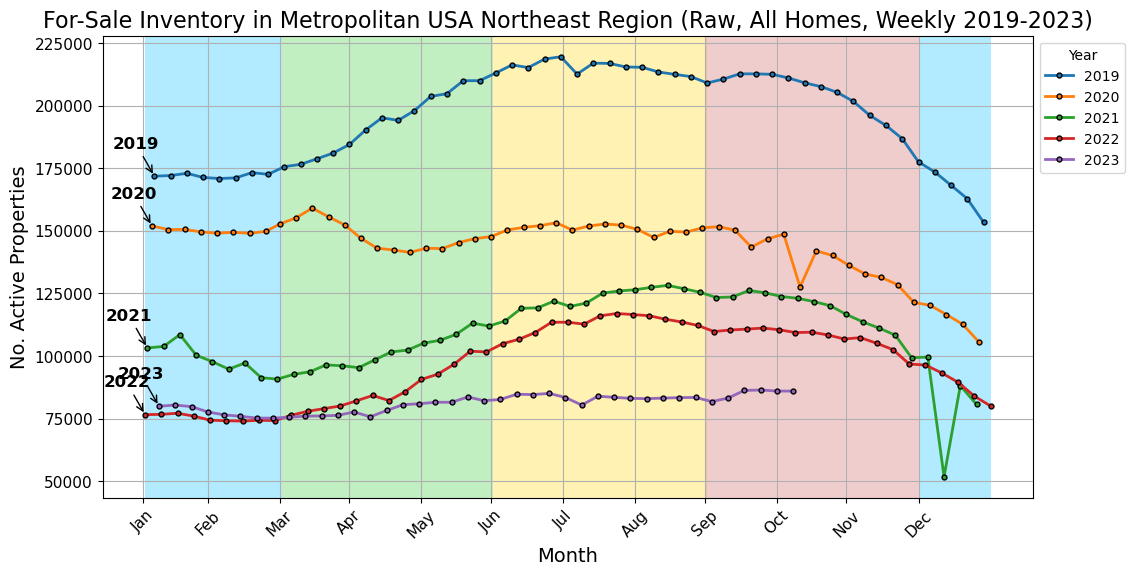

In [6]:
northeast_df = groupby_usa_region[groupby_usa_region["Census Region"] == "Northeast"]

plot_region_time_series(northeast_df)

C:\Users\wazithepa\AppData\Local\Temp\ipykernel_9432\3765977756.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


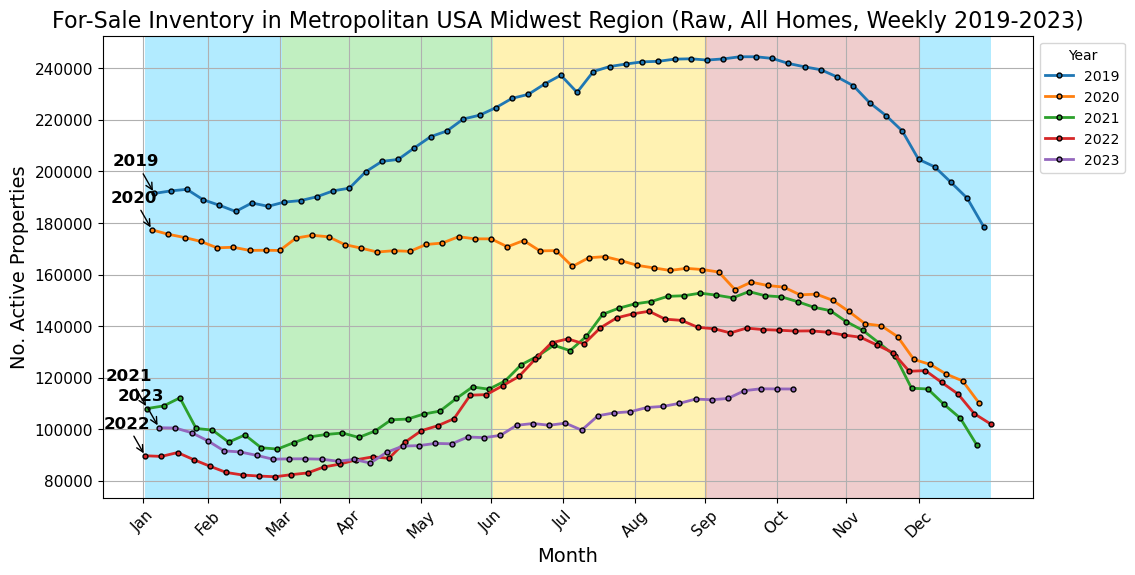

In [7]:
midwest_df = groupby_usa_region[groupby_usa_region["Census Region"] == "Midwest"]

plot_region_time_series(midwest_df)

C:\Users\wazithepa\AppData\Local\Temp\ipykernel_9432\3765977756.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


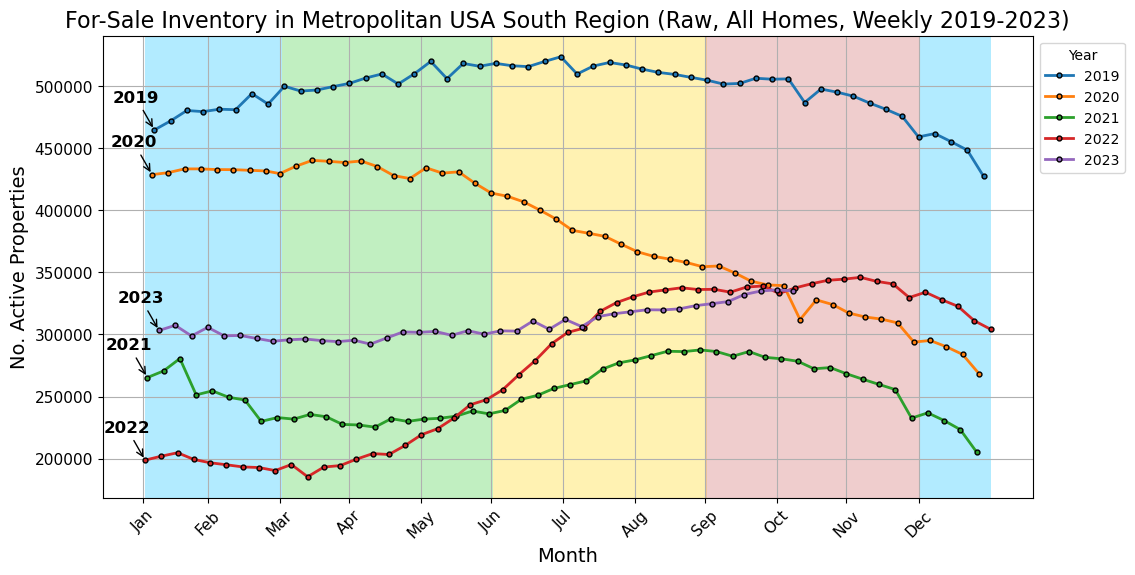

In [8]:
south_df = groupby_usa_region[groupby_usa_region["Census Region"] == "South"]

plot_region_time_series(south_df)

C:\Users\wazithepa\AppData\Local\Temp\ipykernel_9432\3765977756.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df['plot_date'] = region_df['date'].apply(change_year_2021)


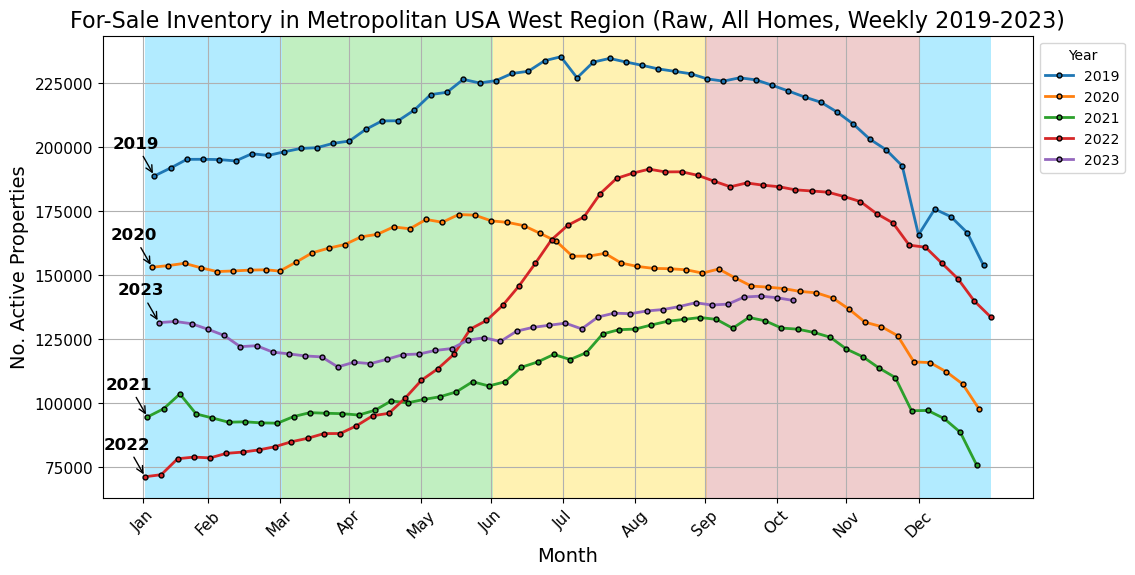

In [9]:
west_df = groupby_usa_region[groupby_usa_region["Census Region"] == "West"]

plot_region_time_series(west_df)